# Student Performance Prediction using Regression

This project explores how a student's **study hours** affect their **exam performance** using **Linear Regression** and **Polynomial Regression**.

We will:
- Load and clean the dataset  
- Explore relationships between variables  
- Train and evaluate regression models  
- Visualize the results  


# Importing libraries and loading dataset

In [70]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.constants import degree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import PolynomialFeatures



In [71]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [72]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [73]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [75]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [76]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

##  Data Cleaning

We remove missing or duplicate rows to ensure clean input for the regression model.


In [77]:
df.dropna(inplace=True)

In [78]:
df.duplicated().sum()

np.int64(0)

# Data Preparing

In [79]:
le=LabelEncoder()
# for categorical columns

cat_cols=['Extracurricular_Activities','Internet_Access','Learning_Disabilities','Gender','School_Type']
for cat in cat_cols:
    df[cat]=le.fit_transform(df[cat])

# for ordinal columns

low_mid_high_map={'Low':1,'Medium':2,'High':3}
low_mid_high_cats=['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']

for cat in low_mid_high_cats:
    df[cat]=df[cat].map(low_mid_high_map)

other_map = {
    'Positive': 1, 'Near': 1, 'High School': 1,
    'Neutral': 2, 'Moderate': 2, 'College': 2,
    'Negative': 3, 'Postgraduate': 3, 'Far': 3
}


other_cats=['Peer_Influence','Distance_from_Home','Parental_Education_Level']



for cat in other_cats:
    df[cat]=df[cat].map(other_map)








In [80]:
    df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,3,4,0,2,2,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,2,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,3,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,2,4,0,2,1,0,70


## Exploratory Data Analysis (EDA)

We’ll visualize relationships and check correlations to understand how `Hours_Studied` affects `Exam_Score`.

**it's clear that the most two related features are attendance and Hours studied**


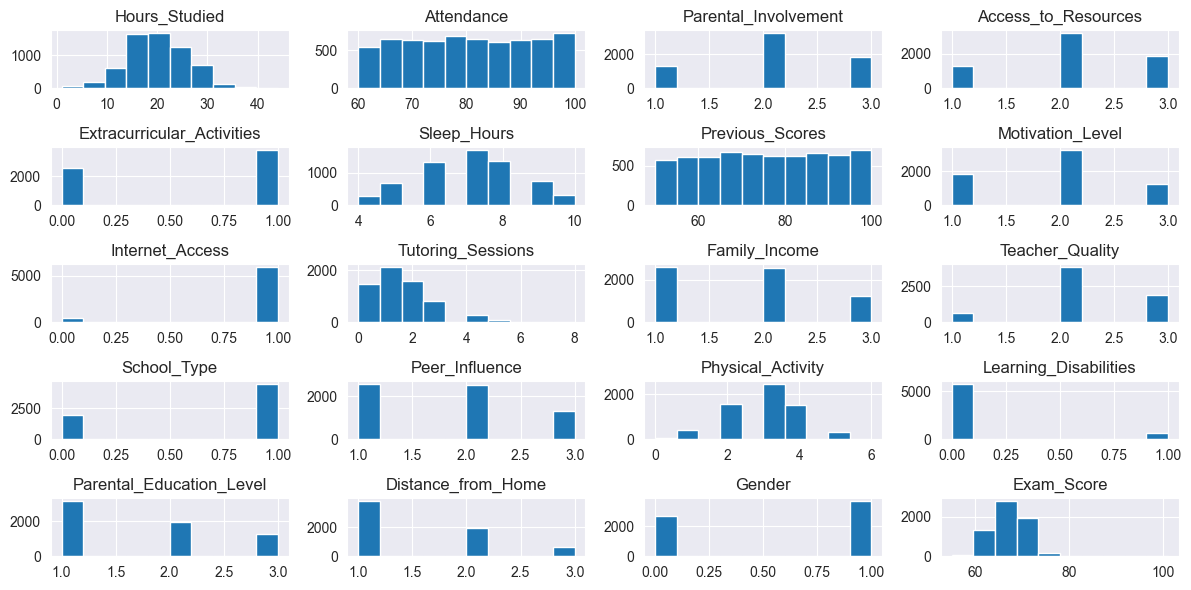

In [81]:
df.hist(figsize=(12,6))
plt.tight_layout()

<Axes: >

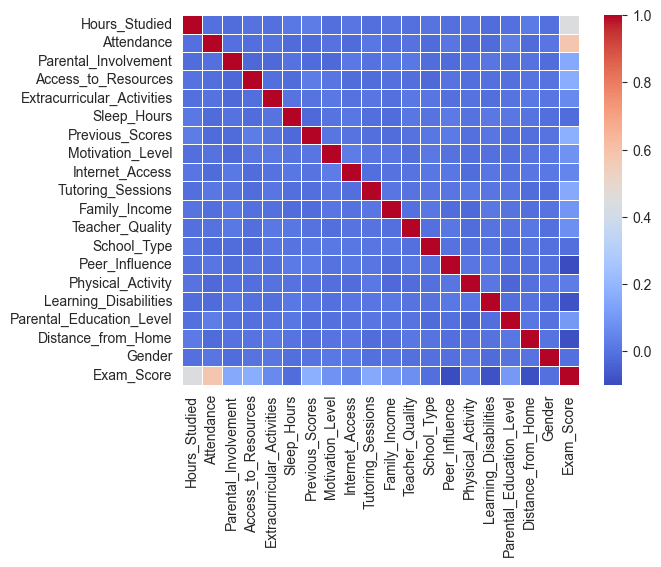

In [82]:
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=0.5)

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

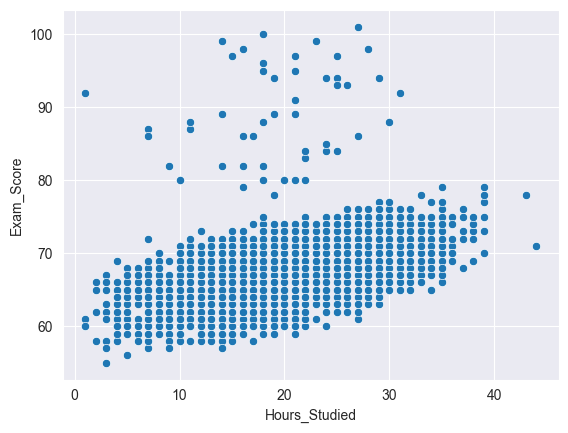

In [83]:
sns.scatterplot(data=df,x="Hours_Studied",y="Exam_Score")

##  Linear Regression Model

We will now train a simple **Linear Regression** model using `Hours_Studied` as the independent variable and `Exam_Score` as the dependent variable.


In [84]:
x,y=df[["Hours_Studied"]],df["Exam_Score"]
sc=StandardScaler()
# x_scaled = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [85]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)


##  Model Evaluation

We evaluate model performance using **MAE**, **MSE**, **RMSE**, and **R²** metrics.


In [86]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [87]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 2.516789775382383
Mean Squared Error (MSE): 12.168329506934915
Root Mean Squared Error (RMSE): 3.4883132753431014
R² Score: 0.2046615457598585


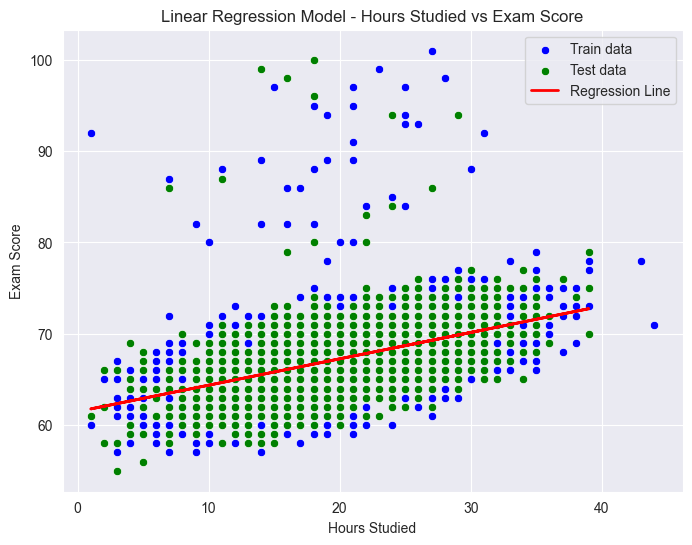

In [88]:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=x_train['Hours_Studied'], y=y_train, color='blue', label='Train data')
    sns.scatterplot(x=x_test['Hours_Studied'], y=y_test, color='green', label='Test data')
    plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel("Hours Studied")
    plt.ylabel("Exam Score")
    plt.title("Linear Regression Model - Hours Studied vs Exam Score")
    plt.legend()
    plt.show()


##  Actual vs Predicted Scores


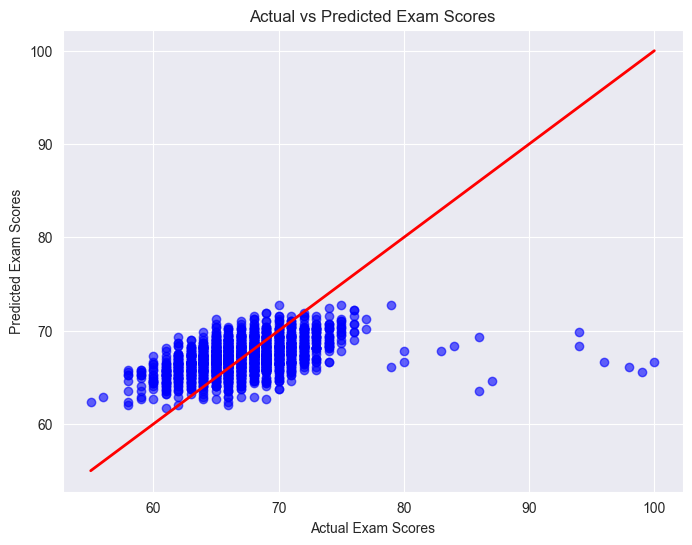

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()


In [90]:
x2=df[['Attendance','Hours_Studied']]
y2=df['Exam_Score']

scaler=StandardScaler()
x2_scaled=scaler.fit_transform(x2)

poly_features=PolynomialFeatures(degree=2)
x2_poly=poly_features.fit_transform(x2_scaled)

x2_train, x2_test,y2_train,y2_test=train_test_split(x2_poly,y2,test_size=0.3,random_state=42)

poly_reg=LinearRegression()
poly_reg.fit(x2_train,y2_train)

y2_pred=lin_reg2.predict(x2_test)

mae2=mean_absolute_error(y2_test,y2_pred)
mse2=mean_squared_error(y2_test,y2_pred)
rmse2=math.sqrt(mse2)
r2_2=r2_score(y2_test,y2_pred)

print("Mean Absolute Error (MAE):", mae2)
print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R² Score:", r2_2)



Mean Absolute Error (MAE): 1.5330337399832694
Mean Squared Error (MSE): 6.841157084937144
Root Mean Squared Error (RMSE): 2.6155605680115963
R² Score: 0.5528527315070674


C:\Users\anasd\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


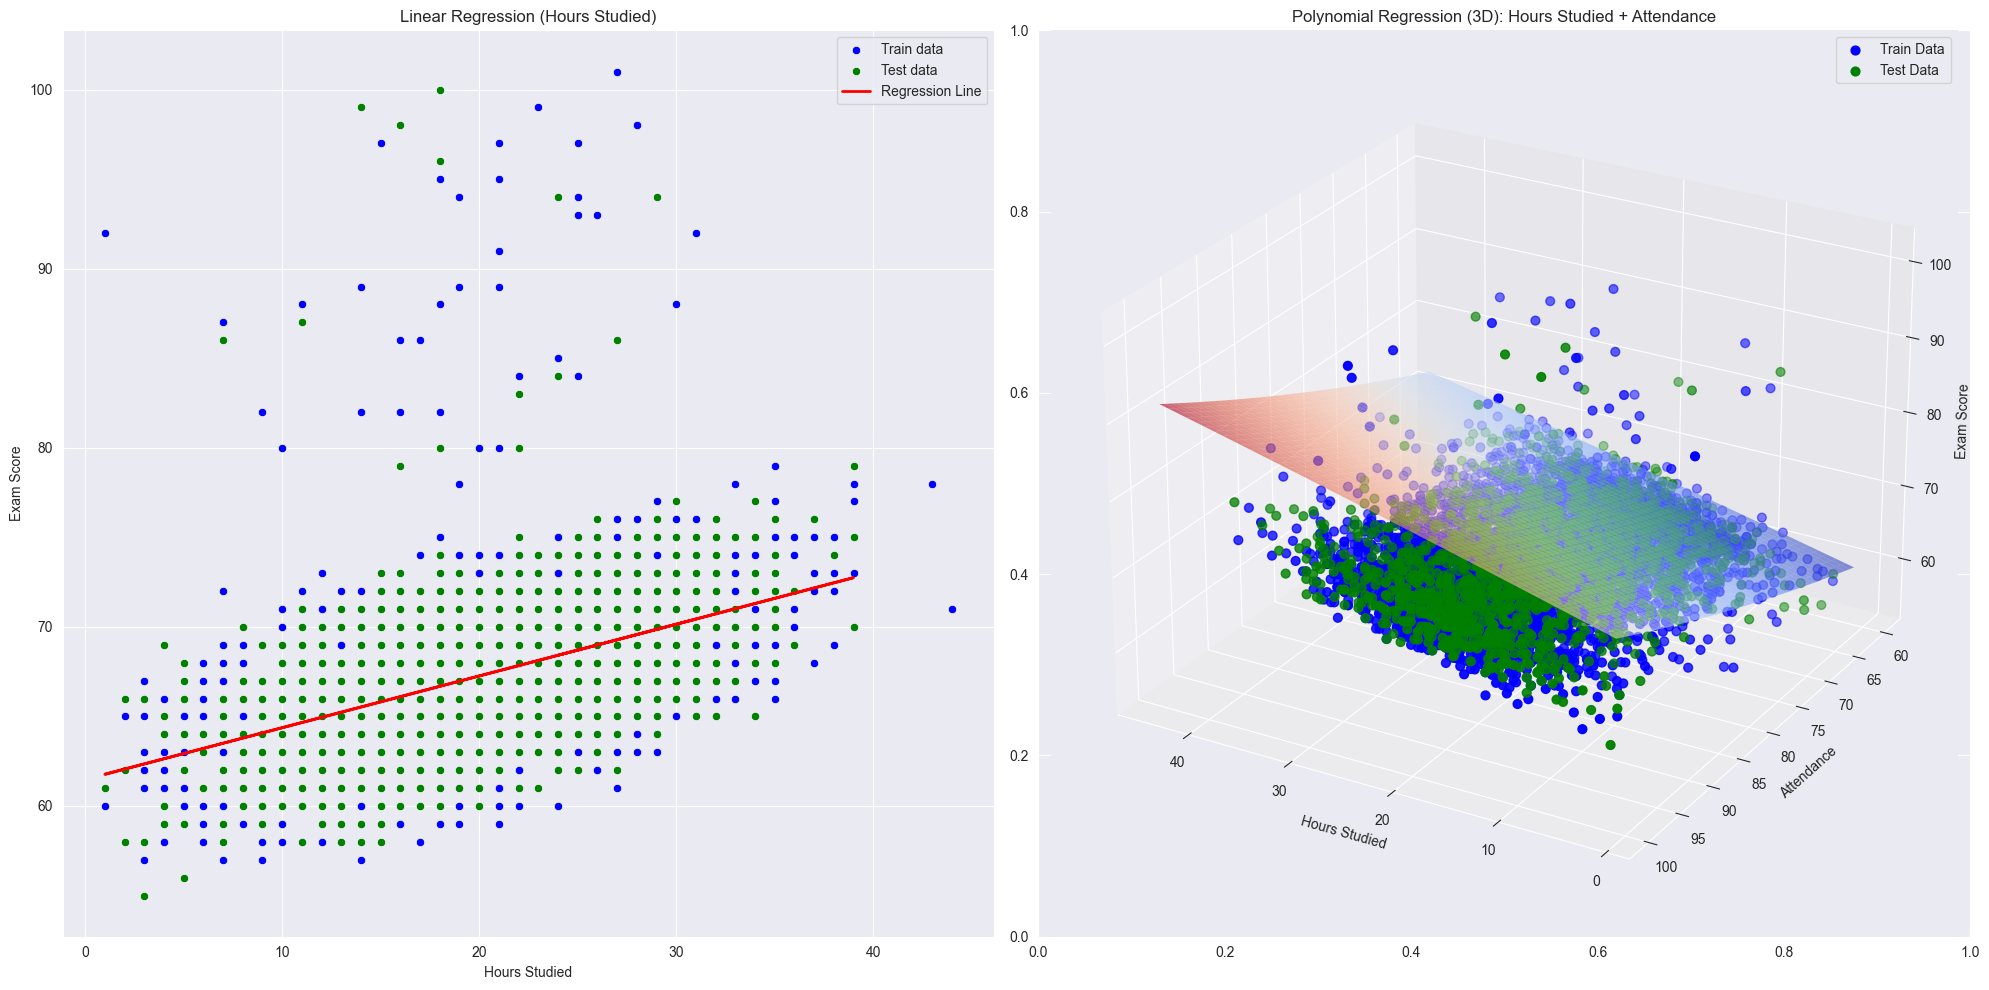

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# --- Left: Linear Regression ---
sns.scatterplot(ax=axes[0], x=x_train['Hours_Studied'], y=y_train, color='blue', label='Train data')
sns.scatterplot(ax=axes[0], x=x_test['Hours_Studied'], y=y_test, color='green', label='Test data')
axes[0].plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel("Hours Studied")
axes[0].set_ylabel("Exam Score")
axes[0].set_title("Linear Regression (Hours Studied)")
axes[0].legend()

# --- Right: Polynomial Regression ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Prepare mesh grid for surface
hours_range = np.linspace(x2['Hours_Studied'].min(), x2['Hours_Studied'].max(), 50)
att_range = np.linspace(x2['Attendance'].min(), x2['Attendance'].max(), 50)
H, A = np.meshgrid(hours_range, att_range)

# Predict values for the grid
grid = np.column_stack((H.ravel(), A.ravel()))
grid_scaled = scaler.transform(grid)
grid_poly = poly_features.transform(grid_scaled)
pred_grid = poly_reg.predict(grid_poly).reshape(H.shape)

# Plot regression surface
ax2.plot_surface(H, A, pred_grid, cmap=cm.coolwarm, alpha=0.6, linewidth=0, antialiased=True)

# Plot train and test points (unscaled)
train_original = df.loc[y2_train.index, ['Hours_Studied', 'Attendance', 'Exam_Score']]
test_original = df.loc[y2_test.index, ['Hours_Studied', 'Attendance', 'Exam_Score']]

ax2.scatter(train_original['Hours_Studied'], train_original['Attendance'], train_original['Exam_Score'],
           color='blue', label='Train Data', s=40)
ax2.scatter(test_original['Hours_Studied'], test_original['Attendance'], test_original['Exam_Score'],
           color='green', label='Test Data', s=40)

# Set labels and style
ax2.set_xlabel('Hours Studied')
ax2.set_ylabel('Attendance')
ax2.set_zlabel('Exam Score')
ax2.set_title('Polynomial Regression (3D): Hours Studied + Attendance')
ax2.view_init(elev=25, azim=120)
ax2.legend()

plt.tight_layout()
plt.show()

# **Results Interpretation & Insights**

**Model Performance Summary
Linear Regression Results**

Our initial linear regression model using only Hours_Studied as a predictor achieved:

R² Score: 0.2047 (20.5%)

RMSE: 3.49 points

MAE: 2.52 points

What this means: The model explains only 20.5% of the variance in exam scores. This is poor performance, indicating that study hours alone cannot effectively predict student performance. On average, predictions are off by about 2.5 points, which on a typical 55-101 point scale represents roughly 5% error.

Key Insight: While study hours matter, they're far from the complete picture. Other factors play crucial roles in student success.

Polynomial Regression Results
Our enhanced polynomial regression model using Hours_Studied + Attendance with polynomial features achieved:

R² Score: 0.5529 (55.3%)

RMSE: 2.62 points

MAE: 1.53 points

What this means: This model explains 55.3% of the variance in exam scores - a 170% improvement over the linear model! The average prediction error dropped from 2.52 to 1.53 points, representing a 39% improvement in accuracy.

Key Insight: The dramatic improvement comes from two factors:

Adding Attendance as a predictor significantly enhanced the model

Polynomial features captured non-linear relationships between variables

This suggests that the relationship between study time, attendance, and performance is not linear. For example, there may be diminishing returns after a certain number of study hours, or attendance becomes more critical at lower study levels.

Understanding R² Score
The R² (R-squared) score measures how much of the variance in exam scores our model can explain:

R² = 0.0: Model is no better than predicting the mean score for everyone

R² = 0.5: Model explains 50% of variance (moderate performance)

R² = 1.0: Perfect predictions (unrealistic in real-world)

